# Plotting with matplotlib
There are many libraries available for plotting, but the 'default' library is `matplotlib`. One other very useful library is called `seaborn`.

In [2]:
# Import library
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Let's create some data for our first plot
x = range(0, 10)
y = [i**2 for i in x]

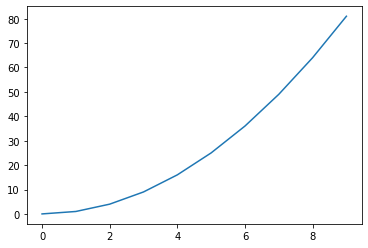

In [4]:
# Basic line plot
plt.plot(x, y)

Text(0, 0.5, 'y')

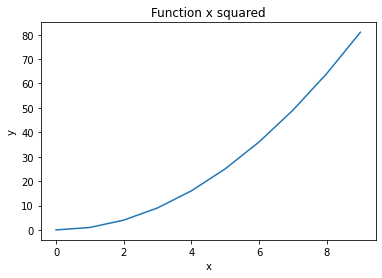

In [5]:
# We want to add some additional elements to the plot
plt.plot(x, y)
plt.title("Function x squared")
plt.xlabel('x')
plt.ylabel('y')

Text(0.5, 1.0, 'square root of x')

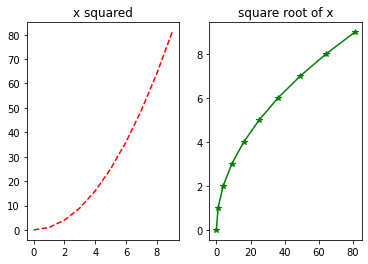

In [6]:
# More than one plot using plt.subplot()
plt.subplot(1, 2, 1) # number of rows, number of columns, plot number
plt.plot(x, y, 'r--') # 'r' stands for red and '--' means dashed
plt.title("x squared")

plt.subplot(1, 2, 2)
plt.plot(y, x, 'g*-')
plt.title("square root of x")

## OOP apprach to matplotlib:
There are two key ingredients: `Figure` and `Axes`. `Figure` is the canvas in the background while `Axes` are the actual plots. `Axes` always live on a `Figure` object.

Text(0.5, 1.0, 'Graph of x squared')

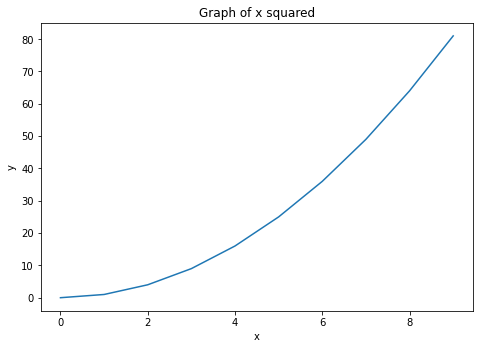

In [10]:
# Create variables
x =  range(0, 10)
y = [i**2 for i in x]

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height
axes.plot(x, y)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Graph of x squared')

Text(0.5, 1.0, 'square root of x')

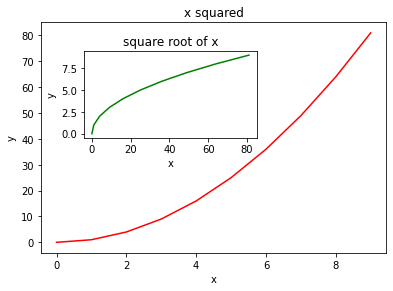

In [13]:
# Plot within a plot
fig = plt.figure()

axes1 = fig.add_axes([0, 0, 0.8, 0.8])
axes2 = fig.add_axes([0.1, 0.4, 0.4, 0.3])

# Main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('x squared')


# Insert second figure
axes2.plot(y, x, 'g')
axes2.set_xlabel('x')
axes2.set_ylabel('y')
axes2.set_title('square root of x')

# Application to stock market data
We are going to use one of Gabor's data sets, but if you want to quickly download stock market data: check out `yfinance`.

In [14]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv('https://osf.io/4pgrf/download')
# df = pd.read_csv('filename')

In [16]:
df.head()

,ticker,ref.date,price.open,price.close,price.adjusted,price.low,price.high,volume
0,ACN,2001-07-19,15.10,15.17,11.497672,15.00,15.29,34994300.0
1,ACN,2001-07-20,15.05,15.01,11.376402,14.80,15.05,9238500.0
2,ACN,2001-07-23,15.00,15.00,11.368821,14.55,15.01,7501000.0
3,ACN,2001-07-24,14.95,14.86,11.262713,14.70,14.97,3537300.0
4,ACN,2001-07-25,14.70,14.95,11.330926,14.65,14.95,4208100.0


In [17]:
# How many observations?
print(f'Our data set has {df.shape[0]} observations.')

Our data set has 304859 observations.


In [18]:
# See some basic descriptives
df.describe()

,price.open,price.close,price.adjusted,price.low,price.high,volume
count,304859.000000,304859.000000,304859.000000,304859.000000,304859.000000,3.048590e+05
mean,41.002155,41.007271,36.693450,40.441201,41.549748,1.099746e+07
std,39.229546,39.219895,37.850934,38.770172,39.658621,2.536388e+07
min,0.207031,0.192708,0.187803,0.145833,0.210938,0.000000e+00
25%,17.750000,17.750000,14.633619,17.440001,18.049999,1.458900e+06
50%,28.760000,28.770000,23.682230,28.320000,29.200001,3.358100e+06
75%,49.675655,49.700001,44.555153,49.000000,50.329691,9.159700e+06
max,344.187500,327.625000,327.625000,320.000000,345.500000,1.855410e+09


In [19]:
# Do we have the same nr of obs per ticker?
df.ticker.value_counts()

ticker
XLNX    5287
SYMC    5287
TXN     5287
IT      5287
SNPS    5287
        ... 
ANET    1152
KEYS    1058
QRVO    1007
PYPL     881
HPE      807
Name: count, Length: 68, dtype: int64

In [21]:
# What object type is ref.date?
# print(type(df["ref.date"])) 

# or

df["ref.date"].describe()

count         304859
unique          5287
top       2017-08-11
freq              68
Name: ref.date, dtype: object

In [22]:
# It is not a datetime object; convert it to appropriate format.
df["ref.date"] = pd.to_datetime(df["ref.date"])

In [25]:
df["ref.date"].describe()

count                           304859
mean     2009-04-20 18:06:44.638209536
min                1997-12-29 00:00:00
25%                2004-04-21 00:00:00
50%                2009-09-03 00:00:00
75%                2014-07-03 00:00:00
max                2019-01-02 00:00:00
Name: ref.date, dtype: object

In [27]:
print(type(df["ref.date"].iloc[0])) # each observation is now a Timestamp

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [33]:
# Plot data for MSFT
date = list(df.loc[df["ticker"] == "MSFT"]["ref.date"])
price = list(df.loc[df["ticker"] == "MSFT"]["price.close"])

Text(0, 0.5, 'Closing price')

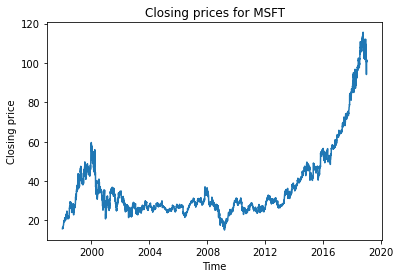

In [34]:
plt.plot(date, price)
plt.title("Closing prices for MSFT")
plt.xlabel("Time")
plt.ylabel("Closing price")

In [36]:
# Use OOP paragidm to add average price to plot
mean_price = np.mean(price)
mean_price

37.29403605012294

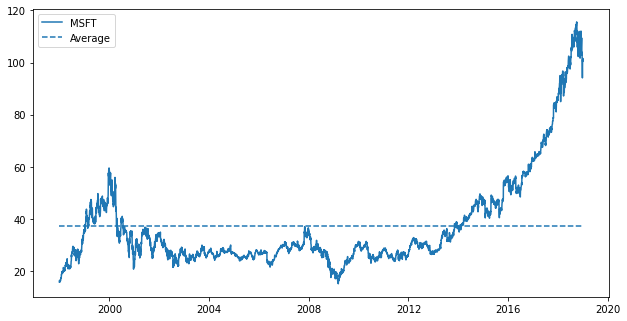

In [40]:
# Create figure
fig = plt.figure(figsize=(8, 4))

# Add axes object
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(date, price, label="MSFT")
ax.hlines(y=mean_price, xmin=date[0], xmax=date[-1], linestyle="--", label="Average")
plt.legend(loc='upper left')